Starting Portfolio Value: 10000.00
Final Portfolio Value: 17029.30
--------------- TradeAnalyzer -----------------
--------------- Transactions -----------------
OrderedDict([(datetime.datetime(2020, 11, 10, 11, 30), [[500, 8.08, 0, '', -4040.0]]), (datetime.datetime(2020, 12, 3, 15, 0), [[500, 7.84, 0, '', -3920.0]]), (datetime.datetime(2021, 6, 30, 10, 30), [[-1000, 13.68, 0, '', 13680.0]]), (datetime.datetime(2021, 9, 7, 15, 0), [[500, 13.84, 0, '', -6920.0]]), (datetime.datetime(2021, 11, 19, 14, 0), [[-500, 16.68, 0, '', 8340.0]])])
--------------- Calmar -----------------
--------------- AnnualReturn 年化收益率 -----------------
OrderedDict([(2020, 0.02361200000000019), (2021, 0.6636479447290573), (2022, 0.0)])
--------------- SharpeRatio -----------------
OrderedDict([('sharperatio', 0.7354027987245896)])
--------------- DrawDown 回撤 -----------------
AutoOrderedDict([('len', 1018), ('drawdown', 6.1452840337912935), ('moneydown', 1115.0200000000004), ('max', AutoOrderedDict([('len', 1

Start date,2020-01-02
End date,2022-12-02
Total months,33
,Backtest
Annual return,20.862%
Cumulative returns,70.293%
Annual volatility,23.098%
Sharpe ratio,0.93
Calmar ratio,0.92
Stability,0.76
Max drawdown,-22.743%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.74,2021-01-08,2021-04-30,2021-05-31,102
1,14.12,2021-06-22,2021-09-29,2021-11-09,101
2,9.54,2020-11-09,2020-12-11,2020-12-22,32
3,7.45,2021-06-07,2021-06-08,2021-06-10,4
4,5.60,2021-11-17,2021-11-19,NaT,NaN


Stress Events,mean,min,max
New Normal,0.09%,-7.45%,8.70%


NameError: name 'b' is not defined

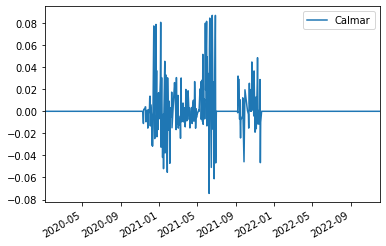

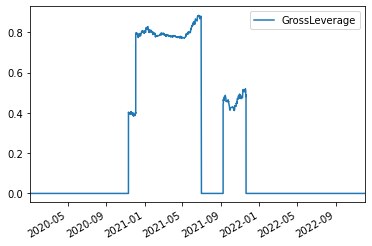

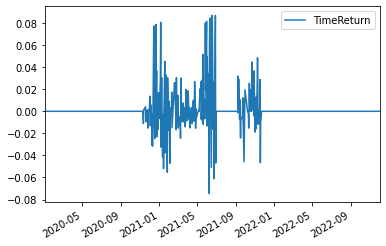

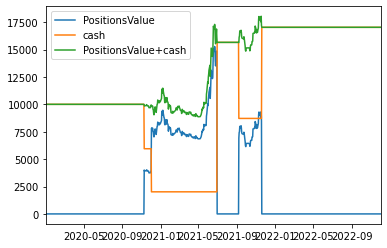

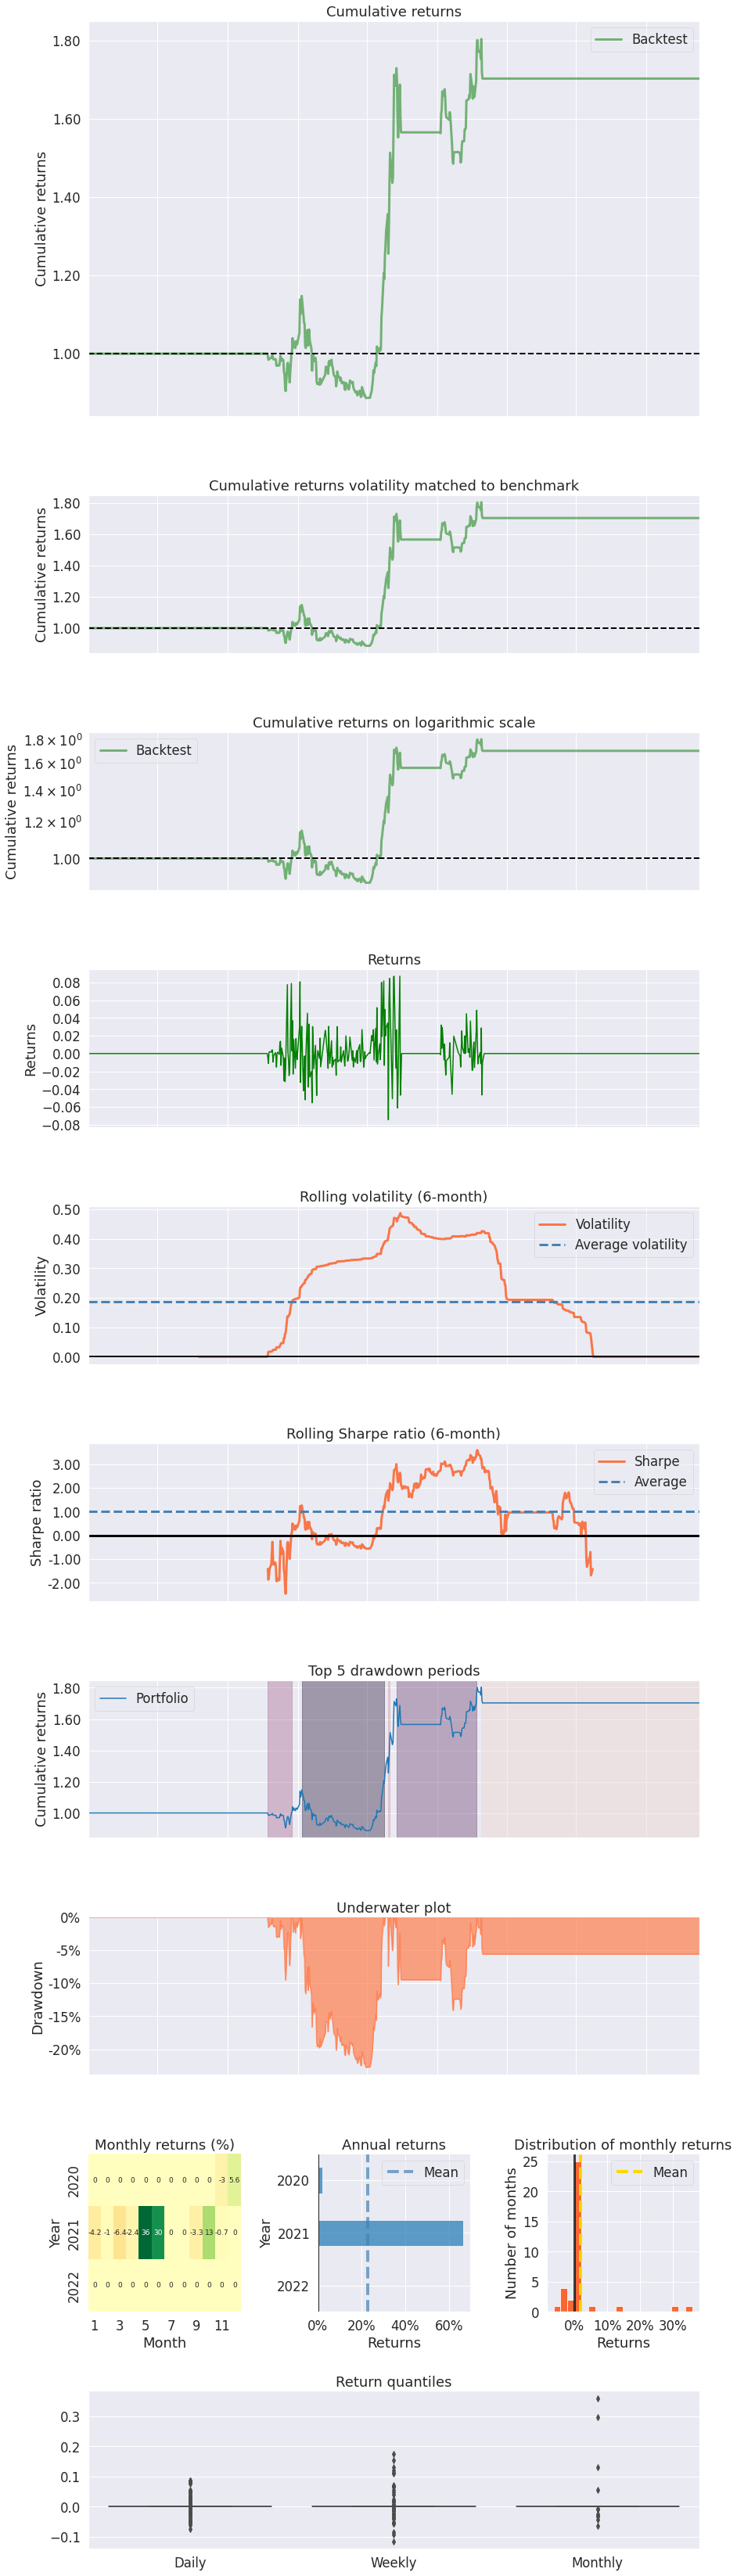

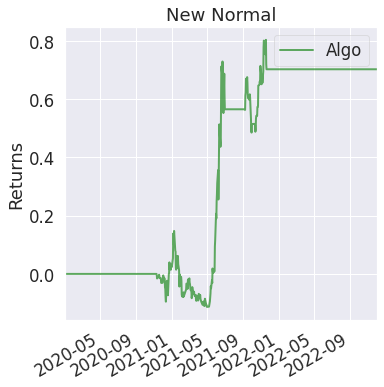

In [2]:
##################################################################################
#####开始自己写1
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
 
import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import pandas as pd
import backtrader as bt
import talib as ta 
from backtrader.order import Order
#from backtrader_plotting import Bokeh
#from backtrader_plotting.schemes import Tradimo
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')
import math
########################################################################################################################### 

# Create a Stratey
class MyStrategy(bt.Strategy): 
    
    params=(('maperiod',15),
            ('printlog',False),
            ('allDat_global',None))

 
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        #print('%s, %s' % (dt.isoformat(), txt))
 
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        # To keep track of pending orders
        self.allDat_global = self.params.allDat_global
    

 
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
                # 做多/做空 订单 已提交/已执行 到/被代理 - 无事可做
                return

        # 检查订单是否已经完成
        # 注意：如果没有足够资金，代理可能拒绝订单
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        
        return

    def notify_trade(self, trade):

        if not trade.isclosed:
            return
        self.log('权益, 赢亏 %.2f, 总赢亏（含佣金） %.2f' %(trade.pnl, trade.pnlcomm))
       
                 
                 
    def next(self):
        #self.datas[0] ↔ self.data0 ↔ self.data
        #self.datas[X].lines[Y] ↔self.data[Y]
        #print(self.datas[0].lines.getlinealiases())
        #print(self.datas[0].lines.datetime[0])
        #index1 =self.datas[0].lines.datetime[0]
        #index2 = bt.num2date(index1)
        #print('self.datas[0].lines.datetime[0] ',index2)
              
        #print(" -1",self.datas[0].datetime.date(-1)," 0",self.datas[0].datetime.date(0))
        #print(" -1",self.data[-1]," 0",self.data[0])
        #print(" -1",self.datas[0].lines.close[-1]," 0",self.datas[0].lines.close[0])
        #print(" -1",self.datas[0].close[-1]," 0",self.datas[0].close[0])
        
        ##self.log('Close, %.2f,operation %f,macdZeros %f' % (self.dataclose[0],operation,macdZeros))
        #print('当前可用资金', self.broker.getcash())
        #print('当前总资产', self.broker.getvalue())
        #print('当前持仓量', self.broker.getposition(self.data).size)
        #print('当前持仓成本', self.broker.getposition(self.data).price)
        # 也可以直接获取持仓
        #print('当前持仓量', self.getposition(self.data).size)
        #print('当前持仓成本', self.getposition(self.data).price)
        # 日志输出收盘价数据
        allDat_global =  self.allDat_global
        index1 =self.datas[0].lines.datetime[0]
        index1 = bt.num2date(index1)
        index1 = pd.Timestamp(index1)
        operation=allDat_global.loc[index1]['operation']
        macdZeros=allDat_global.loc[index1]['macdZeros']
        sub2=allDat_global.loc[index1]['sub2']
        sub2pct=allDat_global.loc[index1]['sub2pct']
        
        
        if macdZeros>=3:
            self.log('下单买单, %.2f' % self.dataclose[0])
                    # 跟踪创建的订单以避免第二个订单
            self.buy(size=500)
            
        if operation <=-2 and self.position:
                 #self.order =self.sell()
                order =self.close()#平仓
                self.log("下单平仓单,%.2f" %self.dataclose[0])
                
        #放弃以下策略，原因是复杂度提高，但是收益提高2%
        #if sub2>0.01  and sub2pct>0:
        #    if operation==-3 and self.position:
        #        order =self.close()#平仓
        #        self.log("下单平仓单,%.2f" %self.dataclose[0])
        #else:
        #    if operation <=-2 and self.position:
        #         #self.order =self.sell()
        #        order =self.close()#平仓
        #        self.log("下单平仓单,%.2f" %self.dataclose[0])
                    
        #self.log('Close, %.2f,operation %f,macdZeros %f' % (self.dataclose[0],operation,macdZeros))
        return
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
########################################################################################################################### 
###人工调试的第1个特征集合
def genFeatures1(df1,params):
    
    vCloses = df1['close']
    #print(vCloses.head(10))
    times =4;#如果是60分钟的数据需要一个加倍,每天4小时交易时间
    sma5 = ta.SMA(vCloses,5*times)
    sma5pct = sma5.pct_change()
    sma10 = ta.SMA(vCloses,10*times)
    sma10pct = sma10.pct_change()
    sma20 = ta.SMA(vCloses,20*times)
    sma20pct = sma20.pct_change()

    sma30 = ta.SMA(vCloses,30*times)
    sma30pct = sma30.pct_change()
    sma30pctpct = sma30pct.pct_change()

    sma2 = ta.SMA(vCloses,2*times)
    sma2pct = sma2.pct_change()
    sma3 = ta.SMA(vCloses,3*times)
    sma3pct = sma3.pct_change()

    sma5 = ta.SMA(vCloses,5*times)
    sma5pct = sma5.pct_change()


    counter = 0
    zeros = pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    flags = pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    revertUps=pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    revertDowns= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])

    revertUps5ma=pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    revertDowns5ma= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])

    changeFlagDown= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    changeFlagUp= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])

    sub1 = pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    

    max4mon = ta.MAX(vCloses,4*21*times)#4month ,4*21*4
    min4mon = ta.MIN(vCloses,4*21*times)#4month ,4*21*4

    operation= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    macdZeros= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    
    
    
    diff, dea,macdhist = ta.MACD(vCloses, fastperiod=12*times, slowperiod=26*times, signalperiod=9*times)
    diffpct = diff.pct_change()
    macdhistpct = macdhist.pct_change()
    lineSLOPE = ta.LINEARREG_SLOPE(vCloses, timeperiod=20*times)
    sma10diff = vCloses - sma10
    
    counter = 0
    lastIndex = 0
    sub1= sma10-max4mon
    sub2 = ta.LINEARREG_SLOPE(sub1, timeperiod=60*times) 
    sub2pct = ta.LINEARREG_SLOPE(sub2, timeperiod=4*times) 
  
    for index, row in sma30pct.items():
        if counter ==0:
            counter= counter+1
            lastIndex = index
            continue
        
  

        ##################################################################    
        ###趋势辨别,上升趋势后边界比较放松，因为上升趋势定卖点，卖点可以由其他特征共同决策
        ###趋势辨别,下降趋势后边界比较紧张，因为下降趋势定买点。买点尽可能接近拐点，以及中间减少甚至消除正跳变

      
        flag =  1 if lineSLOPE[index] > 0 else -1
        if flags[lastIndex] == 1 and (sma10pct[index]>-0.001 or lineSLOPE[index]>-0.01) and sma20pct[index]>0:
            flag = 1


        if flags[lastIndex] == -1 and (sma10pct[index]<0.001 or lineSLOPE[index]<0.01):
            flag = -1






        ##################################################################    
        ###波动辨别
        ##1.基于5ma变化,连续穿越5ma,露出为3ma,美锦为10ma
        if (flag == 1): 
                revertUps5ma[index]=revertUps5ma[lastIndex]  
        #上一时刻大于5ma线，下一时刻小于5ma线，上升阶段5ma反转标记次数+1
        if (flag == 1) and (vCloses[index]<sma5[index]) and (vCloses[lastIndex]>sma5[lastIndex]):
                revertUps5ma[index]=revertUps5ma[lastIndex]+1     

        if (flag == -1): 
                revertDowns5ma[index]=revertDowns5ma[lastIndex]
        #上一时刻小于于5ma线，下一时刻大于5ma线，下降阶段5ma反转标记次数+1
        if (flag == -1) and(vCloses[index]>sma10[index]) and (vCloses[lastIndex]<sma10[lastIndex]):
                revertDowns5ma[index]=revertDowns5ma[lastIndex]+1


        ##################################################################
        ###辨别卖操作,
        if(flag == 1):
            operation[index] =  operation[lastIndex]
        

        #params['revertUps5maSell_1'] = 3
        if (flag ==  1) and (revertUps5ma[index] >=params['revertUps5maSell_1']):
                operation[index] = -1
                
        #params['revertUps5maSell_2'] = 5
        #params['revertUps5maSell_3'] = 10
        if (flag ==  1) and (revertUps5ma[index] >=params['revertUps5maSell_2']) and sub2[index]<0.01:
            operation[index] = -2
        if (flag ==  1) and (revertUps5ma[index] >=params['revertUps5maSell_3']) and sub2[index]>0.01:
            operation[index] = -2

       
        if (macdhist[lastIndex]>0) and (macdhist[index]<0) and sub2[index]>0:
                    operation[index] =operation[index]-1

        ###辨别买操作,加权
        if (macdhist[index]<0.3) and (macdhist[index]>0) and (macdhist[lastIndex]>-0.3) and (macdhist[lastIndex]<0):
                macdZeros[index] = 1
        
        if ( macdZeros[index] ==1  and revertDowns5ma[index] >= params['revertDowns5maBuy_1']):
                macdZeros[index] = 2       
 

        
        
       




        if(macdZeros[index] == 2) and (sub2[index] >-0.01):
            macdZeros[index] = 3
        

        
        #####################################################
        flags[index] =  flag
        lastIndex = index
        
    #################################  
    macdAdd2 = pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    for index, row in macdZeros.items():
         ###macdadd操作
        macdAdd2[index] = macdAdd2[lastIndex]
        if macdZeros[index] ==1 and flags[index] == -1:
            macdAdd2[index] = macdAdd2[index]+1
        
        if (macdZeros[index] == 1 and macdAdd2[index] >= params['revertDowns5maBuy_2']):
               macdZeros[index] = 3     
                
        if flags[index] >0:
            macdAdd2[index] = 0
        
        lastIndex = index
    
    
    allDat = pd.concat([flags,lineSLOPE,sma10,sma10pct,vCloses,operation,revertUps5ma,\
                  revertDowns5ma,macdhist,macdZeros,macdAdd2,max4mon,sub2,sub2pct], axis=1,sort=True)
    allDat.columns = ['flags','lineSLOPE','sma10','sma10pct','vCloses','operation','revertUps5ma',\
                  'revertDowns5ma','macdhist','macdZeros','macdZerosAdd','max4mon','sub2','sub2pct']
    return allDat
    
    
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################    
    
########################################################################################################################### 

        


###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################  
if __name__ == '__main__':
    #
 
  
 
    # Create a Data Feed
    # 本地数据，笔者用Wind获取的东风汽车数据以csv形式存储在本地。
    # parase_dates = True是为了读取csv为dataframe的时候能够自动识别datetime格式的字符串，big作为index
    # 注意，这里最后的pandas要符合backtrader的要求的格式
    df1 = pd.read_csv('露笑科技0002617.csv', index_col=0, parse_dates=True)
    params =dict()
    params['revertDowns5maBuy_2'] = 3
    params['revertDowns5maBuy_1'] = 5
    
    params['revertUps5maSell_2'] = 10
    params['revertUps5maSell_1'] = 5
    params['revertUps5maSell_3'] = 15
    
    allDat =  genFeatures1(df1,params)
    #allDat.plot(linewidth=1,figsize=(15,15),subplots=True,title='ALL DATA')
    
    
    
    '''   
    allDat2 = pd.concat([allDat['flags']*10+10,allDat['sma10'],allDat['vCloses'],allDat['revertDowns5ma'],allDat['revertUps5ma'],allDat['macdZeros'],allDat['macdZerosAdd']\
                        ,allDat['flags']],axis=1,sort=True)
    allDat2.columns = ['flags','sma10','vCloses','revertDowns5ma','revertUps5ma','macdZeros','macdZerosAdd','flags']
    allDat2.plot(linewidth=1,figsize=(15,15),subplots=True,title='revertUps5ma,revertDowns5ma')
    
    allDat2.plot(linewidth=1,figsize=(35,15),title='revertUps5ma,revertDowns5ma')
    
    allDat2 = pd.concat([allDat['flags']*10+10,allDat['sma10'],allDat['vCloses'],allDat['operation']*10-10,allDat['macdZeros'],\
                        allDat['sub2']*100,allDat['sub2pct']],axis=1)
    allDat2.columns = ['flags','sma10','vCloses','operation','macdZeros','sub2','sub2pct']
    allDat2.plot(linewidth=1,figsize=(15,15),subplots=True,title='max4mon,sub1,sub2')
    
    
    allDat2 = pd.concat([allDat['flags']*10+10,allDat['vCloses'],allDat['revertUps5ma'],allDat['operation'],allDat['sub2']],axis=1,sort=True)
    allDat2.columns = ['flags','vCloses','revertUps5ma','operation','sub2']
    allDat2.plot(linewidth=1,figsize=(15,15),subplots=True,title='revertUps5ma')
    
    '''
    
    
    
    
  
    cerebro = bt.Cerebro()
    cerebro.addstrategy(MyStrategy,allDat_global = allDat)
 
    data = bt.feeds.PandasData(dataname=df1,
                        fromdate = datetime.datetime(2020, 1, 2,10,30),
                        todate = datetime.datetime(2022, 12,2,15,0),
                        
                        )
    # Add the Data Feed to Cerebro
    cerebro.adddata(data)
 
    # Set our desired cash start
    cerebro.broker.setcash(10000)
    # 设定佣金
    cerebro.broker.setcommission(commission=0.003)
 
    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
 
    # Run over everything
    cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='AnnualReturn')
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.003, annualize=True, _name='SharpeRatio')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='DrawDown',fund=False)
    cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
    cerebro.addanalyzer(bt.analyzers.TimeDrawDown, _name='TimeDrawDown')
    cerebro.addanalyzer(bt.analyzers.PositionsValue, _name='PositionsValue',cash=True)
    cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='TimeReturn',timeframe= bt.TimeFrame.Days,compression=1)
    cerebro.addanalyzer(bt.analyzers.GrossLeverage, _name='GrossLeverage')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='Returns')
    cerebro.addanalyzer(bt.analyzers.Calmar, _name='Calmar',timeframe= bt.TimeFrame.Days)
    cerebro.addanalyzer(bt.analyzers.Transactions, _name='Transactions')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='TradeAnalyzer')
    
    #cerebro.addobserver(bt.observers.Broker)
     #cerebro.addobserver(bt.observers.Trades)
    #cerebro.addobserver(bt.observers.BuySell)
    #cerebro.addobserver(bt.observers.DrawDown)
    #cerebro.addobserver(bt.observers.TimeReturn)
   
    cerebro.addwriter(bt.WriterFile, out = 'btlog000723.csv', csv = True)

    strats= cerebro.run()
    
    strat = strats[0]
    
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
      
    print("--------------- TradeAnalyzer -----------------")
    #print(strat.analyzers.TradeAnalyzer.get_analysis()) 
    
    print("--------------- Transactions -----------------")
    print(strat.analyzers.Transactions.get_analysis()) 
    #tmp = strat.analyzers.Transactions.get_analysis()
    #dfTmp = pd.DataFrame.from_dict(tmp,orient='index')
    #dfTmp.columns = ['Transactions']
    #dfTmp.plot()
    print("--------------- Calmar -----------------")
    #print(strat.analyzers.Calmar.get_analysis()) 
    tmp = strat.analyzers.TimeReturn.get_analysis()
    dfTmp = pd.DataFrame.from_dict(tmp,orient='index')
    dfTmp.columns = ['Calmar']
    dfTmp.plot()
    
    print("--------------- AnnualReturn 年化收益率 -----------------")
    print(strat.analyzers.AnnualReturn.get_analysis())
    print("--------------- SharpeRatio -----------------")
    print(strat.analyzers.SharpeRatio.get_analysis())
    print("--------------- DrawDown 回撤 -----------------")
    print(strat.analyzers.DrawDown.get_analysis())
    tmp=  strat.analyzers.DrawDown.get_analysis()
    print("max_moneyDown：%.2f" %tmp['max']['moneydown'])
    print("--------------- TimeDrawDown 时间回撤 -----------------")
    print(strat.analyzers.TimeDrawDown.get_analysis())
    print("--------------- GrossLeverage -----------------")
    #rint(strat.analyzers.GrossLeverage.get_analysis())
    tmp = strat.analyzers.GrossLeverage.get_analysis()
    dfTmp = pd.DataFrame.from_dict(tmp,orient='index')
    dfTmp.columns = ['GrossLeverage']
    dfTmp.plot()
    print("--------------- TimeReturn -----------------")
    #print(strat.analyzers.TimeReturn.get_analysis())
    tmp = strat.analyzers.TimeReturn.get_analysis()
    dfTmp = pd.DataFrame.from_dict(tmp,orient='index')
    dfTmp.columns = ['TimeReturn']
    print('\n TimeReturn max \n',dfTmp.max(),'\n TimeReturn min \n',dfTmp.min())
    dfTmp.plot()
    
    print("--------------- PositionsValue 账户股票价值-----------------")
    #print(strat.analyzers.PositionsValue.get_analysis())
    tmp = strat.analyzers.PositionsValue.get_analysis()
    dfTmp = pd.DataFrame.from_dict(tmp,orient='index')
    dfTmp.columns = ['PositionsValue','cash']
    dfTmp['PositionsValue+cash'] = dfTmp['PositionsValue']+dfTmp['cash']
    dfTmp.plot()
    print('\n max \n',dfTmp.max(),'\n min \n',dfTmp.min())
    print('\n 最大亏损%:',(10000-dfTmp['PositionsValue+cash'].min())/100)
    

  
    #print("--------------- Returns 账户股票+现金价值-----------------")
    #print(strat.analyzers.Returns.get_analysis())
    
    # Print out the final result
   
    pyfoliozer = strat.analyzers.getbyname('pyfolio')
    returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
    #print(returns)
    ts=pf.create_full_tear_sheet(returns) 
    # Plot the result
    #b = Bokeh(style='bar', plot_mode='single', scheme=Tradimo())
   
    #cerebro.plot(subplot= True)
    #print(ts)
 
    
    #b = Bokeh(style='bar', plot_mode='single', scheme=Tradimo())
    cerebro.plot()




 Starting Portfolio Value: 10000.00
--------------- AnnualReturn -----------------
OrderedDict([(2020, 0.22607153899999965), (2021, 1.15875910891689), (2022, 0.0)])
--------------- SharpeRatio -----------------
OrderedDict([('sharperatio', 0.9144331963825864)])
--------------- DrawDown -----------------
AutoOrderedDict([('len', 1036), ('drawdown', 4.0590229167600915), ('moneydown', 1119.7920000000013), ('max', AutoOrderedDict([('len', 1036), ('drawdown', 20.88721129911435), ('moneydown', 5256.0)]))])
--------------- PositionsValue 账户股票价值-----------------


<IPython.core.display.Javascript object>


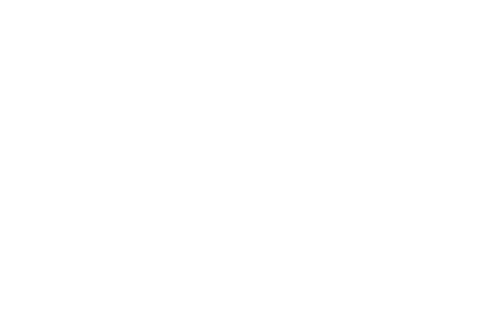


 max 
 PositionsValue         24448.00000
cash                   26467.93103
PositionsValue+cash    27587.72303
dtype: float64 
 min 
 PositionsValue            0.00000
cash                    321.43439
PositionsValue+cash    9655.96848
dtype: float64

 最大亏损%: 3.4403152000000046
Final Portfolio Value: 26467.93


Start date,2020-01-02
End date,2022-12-02
Total months,33
,Backtest
Annual return,41.403%
Cumulative returns,164.679%
Annual volatility,29.075%
Sharpe ratio,1.33
Calmar ratio,2.15
Stability,0.87
Max drawdown,-19.24%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.24,2021-06-22,2021-09-29,2021-10-29,94
1,17.95,2021-01-08,2021-04-30,2021-05-27,100
2,14.84,2020-07-14,2020-07-27,2020-08-06,18
3,12.04,2020-08-10,2020-08-12,2020-08-20,9
4,8.87,2020-08-20,2020-12-21,2021-01-05,99


<IPython.core.display.Javascript object>


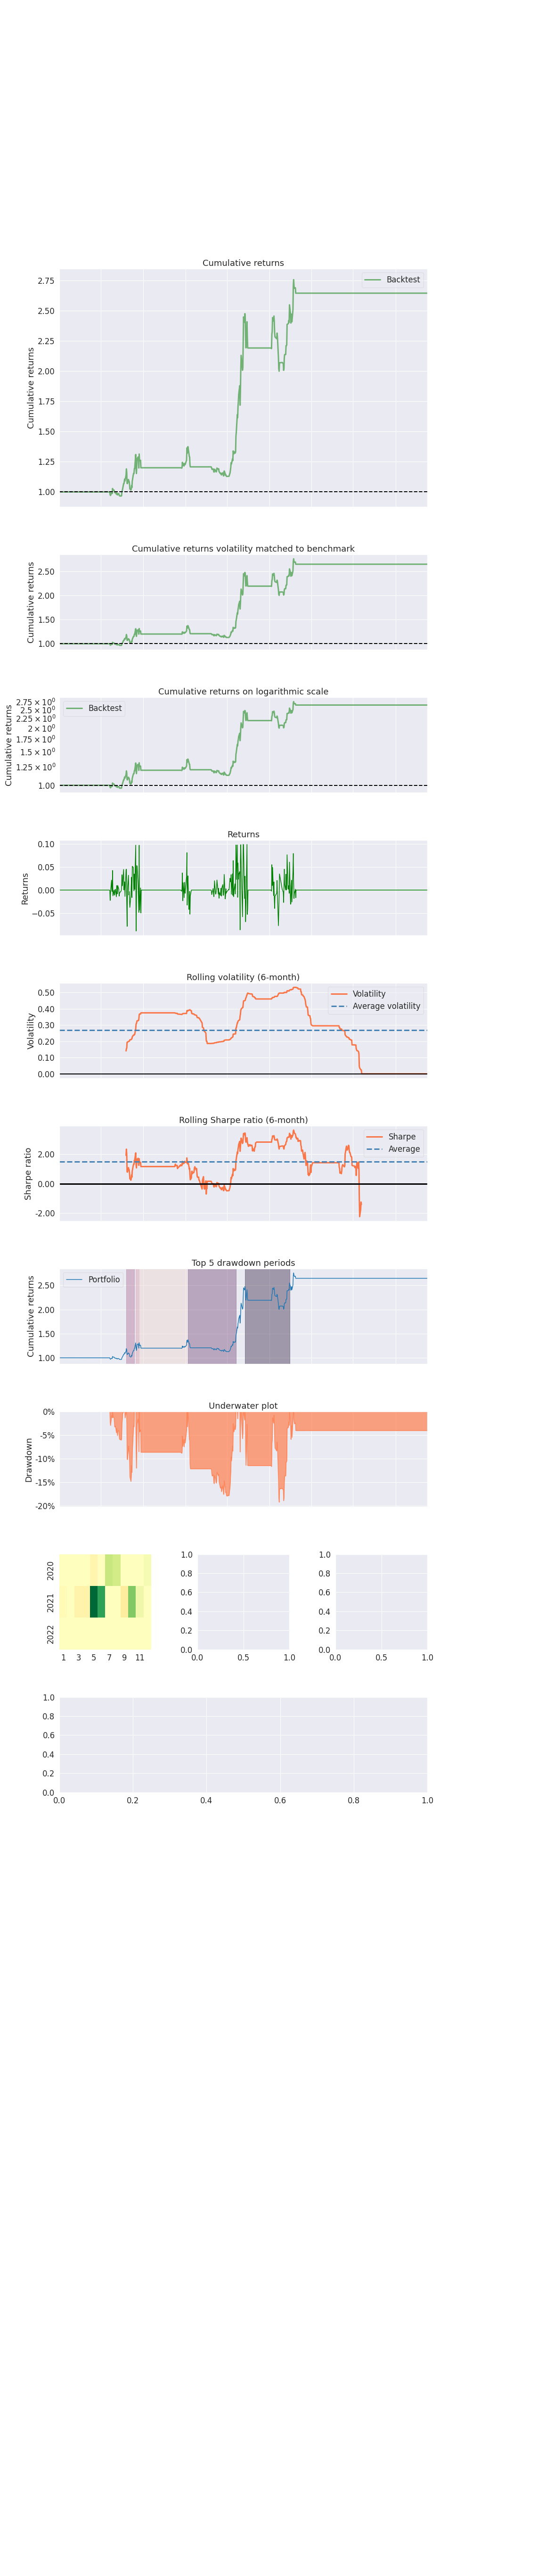

Stress Events,mean,min,max
New Normal,0.15%,-8.85%,9.85%


<IPython.core.display.Javascript object>


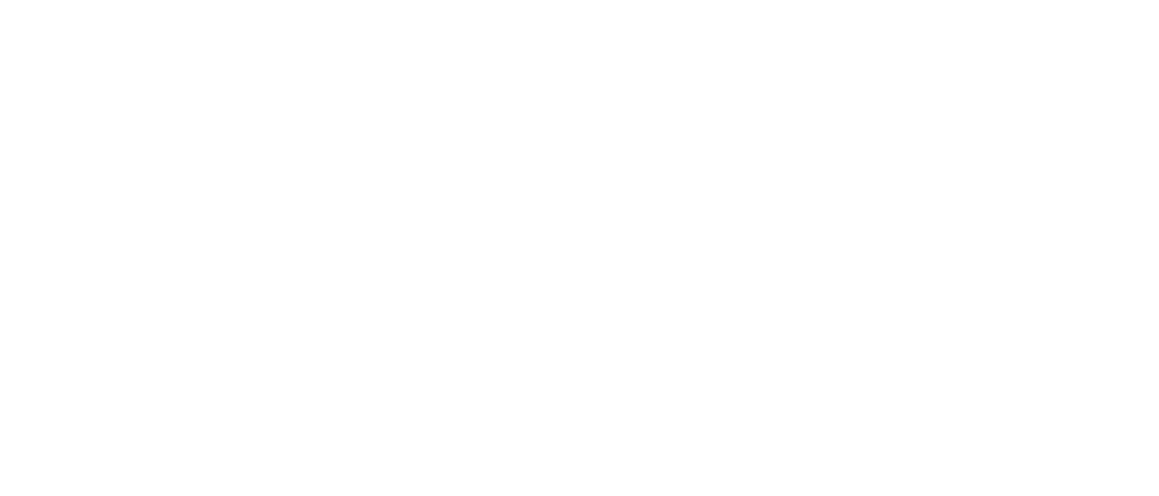

<IPython.core.display.Javascript object>


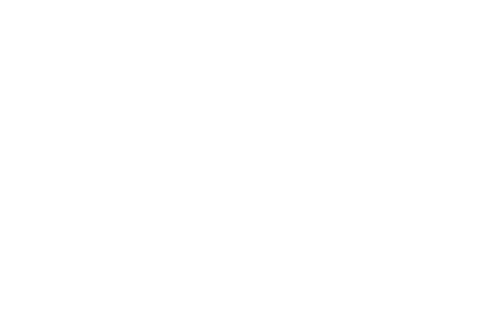

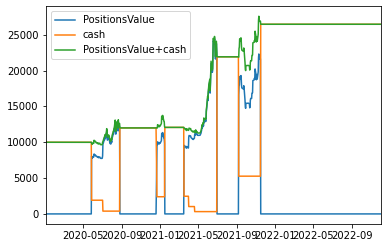

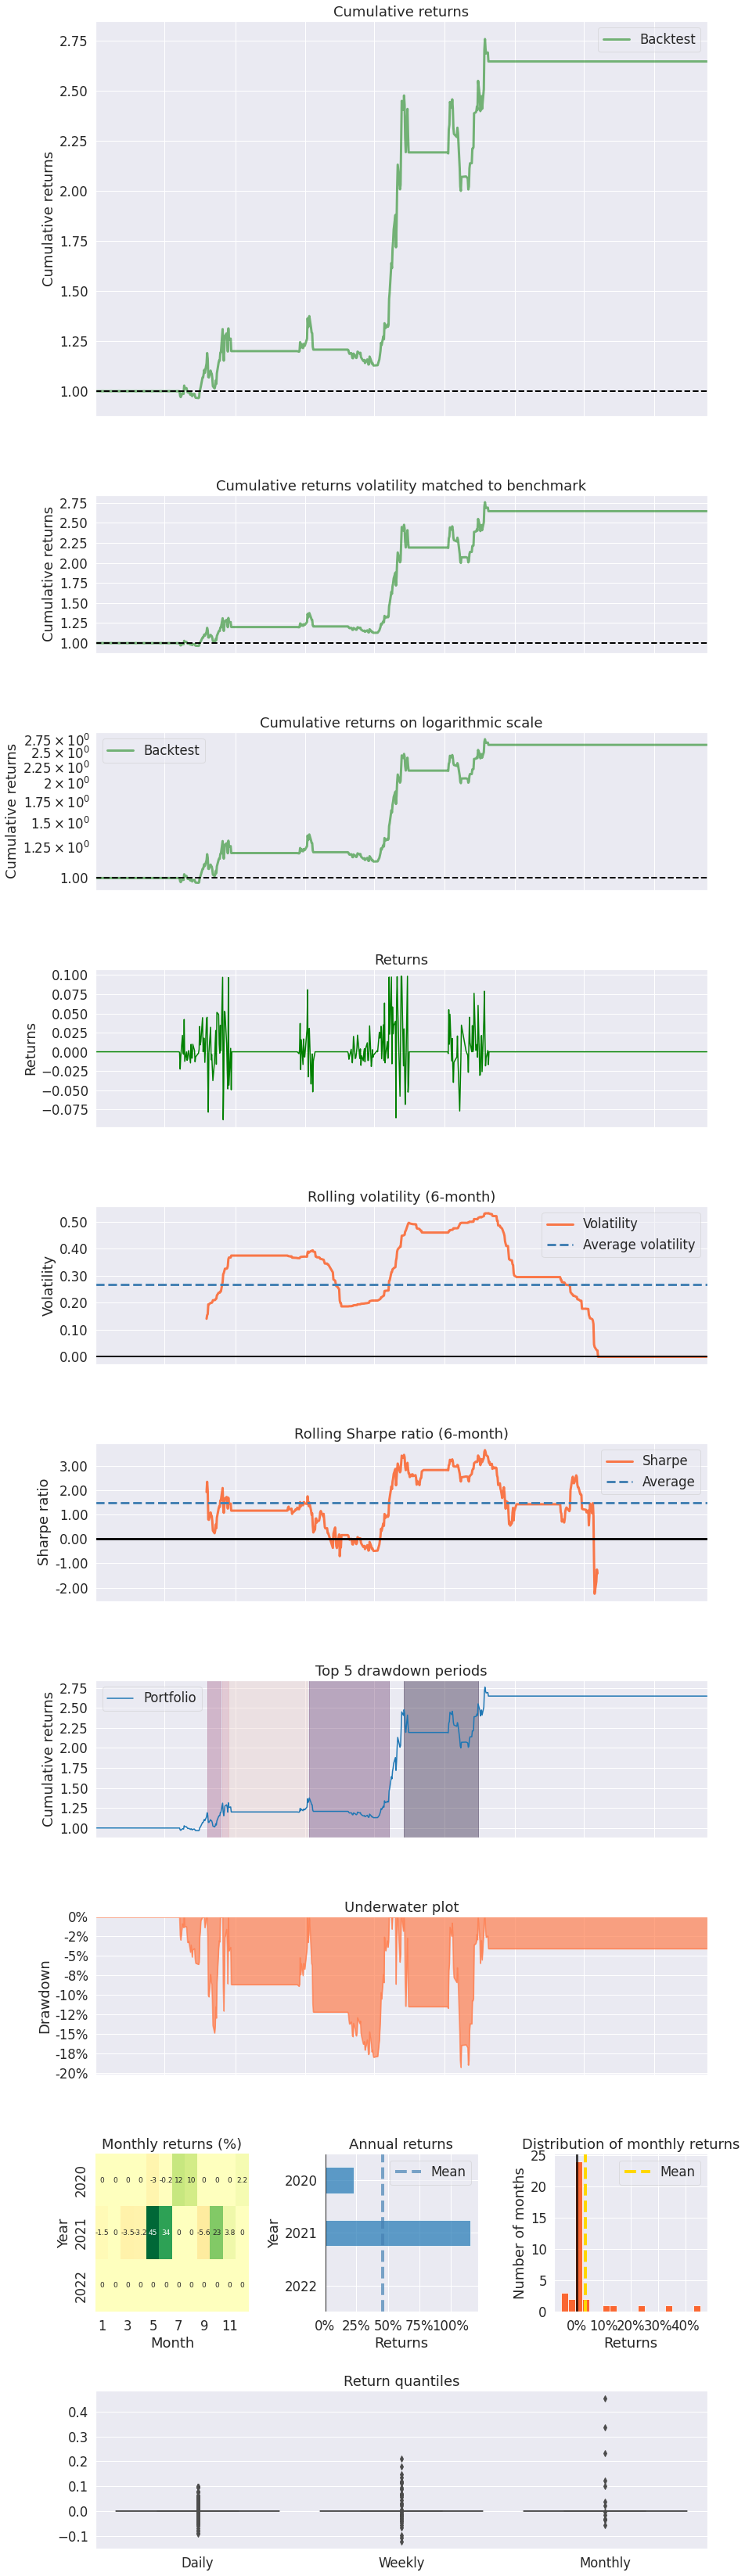

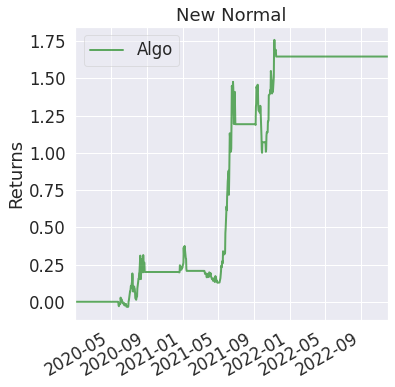

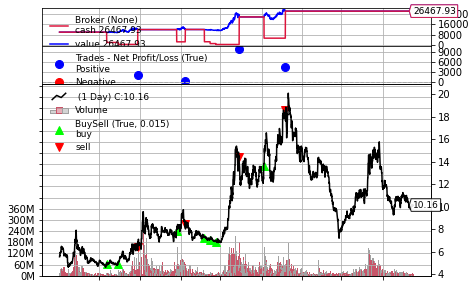

In [6]:
##################################################################################
#####开始用全局优化
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
 
import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import pandas as pd
import backtrader as bt
import talib as ta 
from backtrader.order import Order
#from backtrader_plotting import Bokeh
#from backtrader_plotting.schemes import Tradimo
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')
import math
########################################################################################################################### 

# Create a Stratey
class MyStrategy(bt.Strategy):
    params=(('printlog',False),
            ('allDat_global',None))
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        if self.params.printlog == True:
            print('%s, %s' % (dt.isoformat(), txt))
 
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        # To keep track of pending orders
        self.allDat_global = self.params.allDat_global
        
    

 
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
                # 做多/做空 订单 已提交/已执行 到/被代理 - 无事可做
                return

        # 检查订单是否已经完成
        # 注意：如果没有足够资金，代理可能拒绝订单
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        
        return

    def notify_trade(self, trade):

        if not trade.isclosed:
            return
        self.log('权益, 赢亏 %.2f, 总赢亏（含佣金） %.2f' %(trade.pnl, trade.pnlcomm))
       
                 
                 
    def next(self):
      
        allDat_global = self.allDat_global
        index1 =self.datas[0].lines.datetime[0]
        index1 = bt.num2date(index1)
        index1 = pd.Timestamp(index1)
        operation=allDat_global.loc[index1]['operation']
        macdZeros=allDat_global.loc[index1]['macdZeros']
        sub2=allDat_global.loc[index1]['sub2']
        sub2pct=allDat_global.loc[index1]['sub2pct']
        
        
        if macdZeros>=3:
            self.log('下单买单, %.2f' % self.dataclose[0])
                    # 跟踪创建的订单以避免第二个订单
            order_value = self.broker.get_cash()*0.80
            order_amount = math.floor(order_value/self.dataclose[0]/100)*100
            #print("order_value: %.2f, order_amount: %.2f" %(order_value,order_amount))
            self.order = self.buy(size=order_amount)

            
        if operation <=-2 and self.position:
                 #self.order =self.sell()
                order =self.close()#平仓
                self.log("下单平仓单,%.2f" %self.dataclose[0])
                
        #放弃以下策略，原因是复杂度提高，但是收益提高2%
        #if sub2>0.01  and sub2pct>0:
        #    if operation==-3 and self.position:
        #        order =self.close()#平仓
        #        self.log("下单平仓单,%.2f" %self.dataclose[0])
        #else:
        #    if operation <=-2 and self.position:
        #         #self.order =self.sell()
        #        order =self.close()#平仓
        #        self.log("下单平仓单,%.2f" %self.dataclose[0])
                    
        #self.log('Close, %.2f,operation %f,macdZeros %f' % (self.dataclose[0],operation,macdZeros))
        return
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
########################################################################################################################### 
###人工调试的第1个特征集合
def genFeatures1(df1,params):
    
    vCloses = df1['close']
    #print(vCloses.head(10))
    times =4;#如果是60分钟的数据需要一个加倍,每天4小时交易时间
    sma5 = ta.SMA(vCloses,5*times)
    sma5pct = sma5.pct_change()
    sma10 = ta.SMA(vCloses,10*times)
    sma10pct = sma10.pct_change()
    sma20 = ta.SMA(vCloses,20*times)
    sma20pct = sma20.pct_change()

    sma30 = ta.SMA(vCloses,30*times)
    sma30pct = sma30.pct_change()
    sma30pctpct = sma30pct.pct_change()

    sma2 = ta.SMA(vCloses,2*times)
    sma2pct = sma2.pct_change()
    sma3 = ta.SMA(vCloses,3*times)
    sma3pct = sma3.pct_change()

    sma5 = ta.SMA(vCloses,5*times)
    sma5pct = sma5.pct_change()


    counter = 0
    zeros = pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    flags = pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    revertUps=pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    revertDowns= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])

    revertUps5ma=pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    revertDowns5ma= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])

    changeFlagDown= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    changeFlagUp= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])

    sub1 = pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    

    max4mon = ta.MAX(vCloses,4*21*times)#4month ,4*21*4
    min4mon = ta.MIN(vCloses,4*21*times)#4month ,4*21*4

    operation= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    macdZeros= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    
    
    
    diff, dea,macdhist = ta.MACD(vCloses, fastperiod=12*times, slowperiod=26*times, signalperiod=9*times)
    diffpct = diff.pct_change()
    macdhistpct = macdhist.pct_change()
    lineSLOPE = ta.LINEARREG_SLOPE(vCloses, timeperiod=20*times)
    sma10diff = vCloses - sma10
    
    counter = 0
    lastIndex = 0
    sub1= sma10-max4mon
    sub2 = ta.LINEARREG_SLOPE(sub1, timeperiod=60*times) 
    sub2pct = ta.LINEARREG_SLOPE(sub2, timeperiod=4*times) 
  
    for index, row in sma30pct.items():
        if counter ==0:
            counter= counter+1
            lastIndex = index
            continue
        
  

        ##################################################################    
        ###趋势辨别,上升趋势后边界比较放松，因为上升趋势定卖点，卖点可以由其他特征共同决策
        ###趋势辨别,下降趋势后边界比较紧张，因为下降趋势定买点。买点尽可能接近拐点，以及中间减少甚至消除正跳变

      
        flag =  1 if lineSLOPE[index] > 0 else -1
        if flags[lastIndex] == 1 and (sma10pct[index]>-0.001 or lineSLOPE[index]>-0.01) and sma20pct[index]>0:
            flag = 1


        if flags[lastIndex] == -1 and (sma10pct[index]<0.001 or lineSLOPE[index]<0.01):
            flag = -1






        ##################################################################    
        ###波动辨别
        ##1.基于5ma变化,连续穿越5ma,露出为3ma,美锦为10ma
        if (flag == 1): 
                revertUps5ma[index]=revertUps5ma[lastIndex]  
        #上一时刻大于5ma线，下一时刻小于5ma线，上升阶段5ma反转标记次数+1
        if (flag == 1) and (vCloses[index]<sma5[index]) and (vCloses[lastIndex]>sma5[lastIndex]):
                revertUps5ma[index]=revertUps5ma[lastIndex]+1     

        if (flag == -1): 
                revertDowns5ma[index]=revertDowns5ma[lastIndex]
        #上一时刻小于于5ma线，下一时刻大于5ma线，下降阶段5ma反转标记次数+1
        if (flag == -1) and(vCloses[index]>sma10[index]) and (vCloses[lastIndex]<sma10[lastIndex]):
                revertDowns5ma[index]=revertDowns5ma[lastIndex]+1


        ##################################################################
        ###辨别卖操作,
        if(flag == 1):
            operation[index] =  operation[lastIndex]
        

        #params['revertUps5maSell_1'] = 3
        if (flag ==  1) and (revertUps5ma[index] >=params['revertUps5maSell_1']):
                operation[index] = -1
                
        #params['revertUps5maSell_2'] = 5
        #params['revertUps5maSell_3'] = 10
        if (flag ==  1) and (revertUps5ma[index] >=params['revertUps5maSell_2']) and sub2[index]<0.01:
            operation[index] = -2
        if (flag ==  1) and (revertUps5ma[index] >=params['revertUps5maSell_3']) and sub2[index]>0.01:
            operation[index] = -2

       
        if (macdhist[lastIndex]>0) and (macdhist[index]<0) and sub2[index]>0:
                    operation[index] =operation[index]-1

        ###辨别买操作,加权
        if (macdhist[index]<0.3) and (macdhist[index]>0) and (macdhist[lastIndex]>-0.3) and (macdhist[lastIndex]<0):
                macdZeros[index] = 1
        
        if ( macdZeros[index] ==1  and revertDowns5ma[index] >= params['revertDowns5maBuy_1']):
                macdZeros[index] = 2       
 

        
        
       




        if(macdZeros[index] == 2) and (sub2[index] >-0.01):
            macdZeros[index] = 3
        

        
        #####################################################
        flags[index] =  flag
        lastIndex = index
        
    #################################  
    macdAdd2 = pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    for index, row in macdZeros.items():
         ###macdadd操作
        macdAdd2[index] = macdAdd2[lastIndex]
        if macdZeros[index] ==1 and flags[index] == -1:
            macdAdd2[index] = macdAdd2[index]+1
        
        if (macdZeros[index] == 1 and macdAdd2[index] >= params['revertDowns5maBuy_2']):
               macdZeros[index] = 3     
                
        if flags[index] >0:
            macdAdd2[index] = 0
        
        lastIndex = index
    
    
    allDat = pd.concat([flags,lineSLOPE,sma10,sma10pct,vCloses,operation,revertUps5ma,\
                  revertDowns5ma,macdhist,macdZeros,macdAdd2,max4mon,sub2,sub2pct], axis=1,sort=True)
    allDat.columns = ['flags','lineSLOPE','sma10','sma10pct','vCloses','operation','revertUps5ma',\
                  'revertDowns5ma','macdhist','macdZeros','macdZerosAdd','max4mon','sub2','sub2pct']
    return allDat
    
    
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################    
import pyfolio as pf
 
def runBtOnce(X):
    # Create a cerebro entity
      # Create a Data Feed
    # 本地数据，笔者用Wind获取的东风汽车数据以csv形式存储在本地。
    # parase_dates = True是为了读取csv为dataframe的时候能够自动识别datetime格式的字符串，big作为index
    # 注意，这里最后的pandas要符合backtrader的要求的格式
    df1 = pd.read_csv('露笑科技0002617.csv', index_col=0, parse_dates=True)
    
    params =dict()
    if X == None:
        params['revertDowns5maBuy_1'] = 7 #revertDown5ma
        params['revertDowns5maBuy_2'] = 3 #macdZerosAdd
        params['revertUps5maSell_1'] =3 #
        params['revertUps5maSell_2'] =5 #(revertUps5ma[index] >=params['revertUps5maSell_2']) and sub2[index]<0.01:
        params['revertUps5maSell_3'] =10#(revertUps5ma[index] >=params['revertUps5maSell_2']) and sub2[index]>0.01:
    else:
        params = X
    
    allDat =  genFeatures1(df1,params)
    #allDat.plot(linewidth=1,figsize=(15,15),subplots=True,title='ALL DATA')
    
  
    
    '''   
    allDat2 = pd.concat([allDat['flags']*10+10,allDat['sma10'],allDat['vCloses'],allDat['revertDowns5ma'],allDat['revertUps5ma'],allDat['macdZeros'],allDat['macdZerosAdd']\
                        ,allDat['flags']],axis=1,sort=True)
    allDat2.columns = ['flags','sma10','vCloses','revertDowns5ma','revertUps5ma','macdZeros','macdZerosAdd','flags']
    allDat2.plot(linewidth=1,figsize=(15,15),subplots=True,title='revertUps5ma,revertDowns5ma')
    
    allDat2.plot(linewidth=1,figsize=(35,15),title='revertUps5ma,revertDowns5ma')
    
    allDat2 = pd.concat([allDat['flags']*10+10,allDat['sma10'],allDat['vCloses'],allDat['operation']*10-10,allDat['macdZeros'],\
                        allDat['sub2']*100,allDat['sub2pct']],axis=1)
    allDat2.columns = ['flags','sma10','vCloses','operation','macdZeros','sub2','sub2pct']
    allDat2.plot(linewidth=1,figsize=(15,15),subplots=True,title='max4mon,sub1,sub2')
    
    
    allDat2 = pd.concat([allDat['flags']*10+10,allDat['vCloses'],allDat['revertUps5ma'],allDat['operation'],allDat['sub2']],axis=1,sort=True)
    allDat2.columns = ['flags','vCloses','revertUps5ma','operation','sub2']
    allDat2.plot(linewidth=1,figsize=(15,15),subplots=True,title='revertUps5ma')
    
    '''
    
    
    
    
  
    cerebro = bt.Cerebro()
    cerebro.addstrategy(MyStrategy,allDat_global = allDat)
 
    data = bt.feeds.PandasData(dataname=df1,
                        fromdate = datetime.datetime(2020, 1, 2,10,30),
                        todate = datetime.datetime(2022, 12,2,15,0),
                        
                        )
    # Add the Data Feed to Cerebro
    cerebro.adddata(data)
 
    # Set our desired cash start
    cerebro.broker.setcash(10000)
    # 设定佣金
    cerebro.broker.setcommission(commission=0.003)
 
    cerebro.addanalyzer(bt.analyzers.PositionsValue, _name='PositionsValue',cash=True)
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='DrawDown',fund=False)
    # Print out the starting conditions
    print('\n Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
 
    # Run over everything
    cerebro.run()
 
    
    #print("--------------- DrawDown 回撤 -----------------")
    tmp = strat.analyzers.DrawDown.get_analysis()
    max_moneyDown = tmp['max']['moneydown']
    
    #print("--------------- PositionsValue 账户股票价值-----------------")
    #print(strat.analyzers.PositionsValue.get_analysis())
    tmp = strat.analyzers.PositionsValue.get_analysis()
    dfTmp = pd.DataFrame.from_dict(tmp,orient='index')
    dfTmp.columns = ['PositionsValue','cash']
    dfTmp['PositionsValue+cash'] = dfTmp['PositionsValue']+dfTmp['cash']
    #dfTmp.plot()
   
    maxloss = 10000-dfTmp['PositionsValue+cash'].min()
    finalValue = cerebro.broker.getvalue()-10000
    rvl =  finalValue-max_moneyDown
    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    print('max_moneyDown: %.2f,maxLoss %.2f,finalValue %.2f, finalValue-max_moneyDown:%.2f' %(max_moneyDown,maxloss,finalValue,rvl))
    return rvl

def runBtOnceAndShow(params):
    # Create a cerebro entity
      # Create a Data Feed
    # 本地数据，笔者用Wind获取的东风汽车数据以csv形式存储在本地。
    # parase_dates = True是为了读取csv为dataframe的时候能够自动识别datetime格式的字符串，big作为index
    # 注意，这里最后的pandas要符合backtrader的要求的格式
    df1 = pd.read_csv('露笑科技0002617.csv', index_col=0, parse_dates=True)
    
    if params == None:
        return None
   
    
    allDat =  genFeatures1(df1,params)   
    cerebro = bt.Cerebro()
    cerebro.addstrategy(MyStrategy,allDat_global = allDat)
    data = bt.feeds.PandasData(dataname=df1,
                        fromdate = datetime.datetime(2020, 1, 2,10,30),
                        todate = datetime.datetime(2022, 12,2,15,0),              
                        )
    # Add the Data Feed to Cerebro
    cerebro.adddata(data)
    # Set our desired cash start
    cerebro.broker.setcash(10000)
    cerebro.broker.set_slippage_perc(0.01)
    # 设定佣金
    cerebro.broker.setcommission(commission=0.003)
    # Print out the starting conditions
    print('\n Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
 
     # Run over everything
    cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='AnnualReturn')
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.003, annualize=True, _name='SharpeRatio')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='DrawDown')
    cerebro.addanalyzer(bt.analyzers.Calmar, _name='Calmar')
    cerebro.addanalyzer(bt.analyzers.PositionsValue, _name='PositionsValue',cash=True)
    cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
    strats= cerebro.run()
    
    strat = strats[0]

    print("--------------- AnnualReturn -----------------")
    print(strat.analyzers.AnnualReturn.get_analysis())
    print("--------------- SharpeRatio -----------------")
    print(strat.analyzers.SharpeRatio.get_analysis())
    print("--------------- DrawDown -----------------")
    print(strat.analyzers.DrawDown.get_analysis())
    tmp = strat.analyzers.DrawDown.get_analysis()
    max_moneyDown = tmp['max']['moneydown']
    #print("--------------- Calmar -----------------")
    #print(strat.analyzers.Calmar.get_analysis())
    #print("--------------- GrossLeverage -----------------")
    #print(strat.analyzers.GrossLeverage.get_analysis()
    
    print("--------------- PositionsValue 账户股票价值-----------------")
    #print(strat.analyzers.PositionsValue.get_analysis())
    tmp = strat.analyzers.PositionsValue.get_analysis()
    dfTmp = pd.DataFrame.from_dict(tmp,orient='index')
    dfTmp.columns = ['PositionsValue','cash']
    dfTmp['PositionsValue+cash'] = dfTmp['PositionsValue']+dfTmp['cash']
    dfTmp.plot()
    print('\n max \n',dfTmp.max(),'\n min \n',dfTmp.min())
    print('\n 最大亏损%:',(10000-dfTmp['PositionsValue+cash'].min())/100)
    
    
    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    pyfoliozer = strat.analyzers.getbyname('pyfolio')
    returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
    pf.create_full_tear_sheet(returns) 
    # Plot the result
    #b = Bokeh(style='bar', plot_mode='single', scheme=Tradimo())
    cerebro.plot()
    return cerebro.broker.getvalue()-10000
########################################################################################################    
########################################################################################################
from scipy.optimize import dual_annealing,basinhopping,differential_evolution

def objective(x):
    
    #params['revertDowns5maBuy_1'] = 5 #revertDown5ma，穿过ma线的次数，在下降阶段
    #params['revertDowns5maBuy_2'] = 3 #macdZerosAdd,macd累计出现次数，在下降阶段
    #params['revertUps5maSell_1'] =5 #  卖标志为-1
    #params['revertUps5maSell_2'] =10 #(revertUps5ma[index] >=params['revertUps5maSell_2']) and sub2[index]<0.01:卖标志为-2
    #params['revertUps5maSell_3'] =15#(revertUps5ma[index] >=params['revertUps5maSell_2']) and sub2[index]>0.01:卖标志为-2
    
    revertDowns5maBuy_1,revertDowns5maBuy_2, revertUps5maSell_1,revertUps5maSell_2,revertUps5maSell_3  = x
    
    params =dict()
    params['revertDowns5maBuy_1'] = round(revertDowns5maBuy_1) 
    params['revertDowns5maBuy_2'] = round(revertDowns5maBuy_2)
    params['revertUps5maSell_1'] = round(revertUps5maSell_1)
    params['revertUps5maSell_2'] = round(revertUps5maSell_2)
    params['revertUps5maSell_3'] =round(revertUps5maSell_3)
    RVL = runBtOnce(params)
    print('curren params',params)
    return -RVL


####main main main main main main main main main main ###########################################################
####main main main main main main main main main main ###########################################################
####main main main main main main main main main main ###########################################################
#https://vimsky.com/examples/usage/python-scipy.optimize.dual_annealing.html
#params = {'revertDowns5maBuy_1': 5, 'revertDowns5maBuy_2': 3, 'revertUps5maSell_1': 5, 'revertUps5maSell_2': 10, 'revertUps5maSell_3': 15}
params =  {'revertDowns5maBuy_1': 19, 'revertDowns5maBuy_2': 3, 'revertUps5maSell_1': 1, 'revertUps5maSell_2': 6, 'revertUps5maSell_3': 17}
runBtOnceAndShow(params)

if 0:
    buy1bound = [4,20]
    buy2bound = [3,10]
    sell1bound = [1,5]
    sell2bound = [5,20]
    sell3bound = [5,40]
    bounds = [buy1bound, buy2bound,sell1bound,sell2bound,sell3bound]
    result = dual_annealing(objective, bounds,maxiter=10,maxfun = 1000,x0=[19,3,1,6,17])#maxfun == 100在腾讯4核8G大概是6min
    print('Status : %s' % result['message'])
    print('Total Evaluations: %d' % result['nfev'])
    # evaluate solution
    solution = result['x']
    evaluation = objective(solution)
    print('Solution: f(%s) = %.5f' % (solution, evaluation))
    print(result)


In [ ]:
    df1 = pd.read_csv('露笑科技0002617.csv', index_col=0, parse_dates=True)
    
    #params['revertDowns5maBuy_1'] = 5 #revertDown5ma，穿过ma线的次数，在下降阶段
    #params['revertDowns5maBuy_2'] = 3 #macdZerosAdd,macd累计出现次数，在下降阶段
    #params['revertUps5maSell_1'] =5 #  卖标志为-1
    #params['revertUps5maSell_2'] =10 #(revertUps5ma[index] >=params['revertUps5maSell_2']) and sub2[index]<0.01:卖标志为-2
    #params['revertUps5maSell_3'] =15#(revertUps5ma[index] >=params['revertUps5maSell_2']) and sub2[index]>0.01:卖标志为-2
    
    params =dict()
    params['revertDowns5maBuy_1'] = 5
    params['revertDowns5maBuy_2'] = 3
    
    params['revertUps5maSell_1'] = 5
    params['revertUps5maSell_2'] = 10
    params['revertUps5maSell_3'] = 15
    

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.2.2